In [3]:
pip install nltk

^C


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.6 MB/s  0:00:00

   ---------------------------------------- 0/3 [tqdm]
   ------------- -------------------------- 1/3 [regex]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Data Preperation
import pandas as pd

df = pd.read_csv('D:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/Data/news.tsv',sep='\t')
df.head()

,News ID,Category,Topic,Headline,News body,Title entity,Entity content
0,N10000,sports,soccer,Predicting Atlanta United's lineup against Col...,"Only FIVE internationals allowed, count em, FI...","{""Atlanta United's"": 'Atlanta United FC'}","{'Atlanta United FC': {'type': 'item', 'id': '..."
1,N10001,news,newspolitics,Mitch McConnell: DC statehood push is 'full bo...,WASHINGTON -- Senate Majority Leader Mitch McC...,"{'DC': 'Washington, D.C.'}","{'Washington, D.C.': {'type': 'item', 'id': 'Q..."
2,N10002,news,newsus,Home In North Highlands Damaged By Fire,NORTH HIGHLANDS (CBS13) Fire damaged a home ...,{},{}
3,N10003,news,newspolitics,Meghan McCain blames 'liberal media' and 'thir...,Meghan McCain is speaking out after a journali...,{},{}
4,N10004,news,newsworld,Today in History: Aug 1,"1714: George I becomes King Georg Ludwig, Elec...",{},{}


In [3]:
df.tail()

,News ID,Category,Topic,Headline,News body,Title entity,Entity content
113757,N123757,sports,soccer_fifa_wwc,Hope who? Alyssa Naeher's penalty save sends U...,"LYON, France At the conclusion of the United...","{'USWNT': ""United States women's national socc...","{""United States women's national soccer team"":..."
113758,N123758,sports,baseball_mlb,Chris Sale Explains What Specifically Has Gone...,The first half of Chris Sale's season could be...,{},{}
113759,N123759,sports,basketball_nba_videos,Raptor fans jam streets to celebrate 1st NBA t...,Canadians are celebrating the country's first ...,{'NBA': 'National Basketball Association'},{'National Basketball Association': {'type': '...
113760,N123760,news,newspolitics,Judge won't allow Flynn to fire his attorneys,A federal judge denied the request by Michael ...,{'Flynn': 'Michael Flynn'},"{'Michael Flynn': {'type': 'item', 'id': 'Q683..."
113761,N123761,sports,football_nfl,Worley thinks he and Conley will rival greates...,Confidence imparts a wonderful inspiration on ...,{'Conley': 'Mike Conley Jr.'},"{'Mike Conley Jr.': {'type': 'item', 'id': 'Q9..."


In [4]:
df['Category'].value_counts()

Category
sports           30557
news             26689
finance          10571
lifestyle         7405
autos             5494
travel            5381
foodanddrink      5286
video             4968
tv                3981
health            3799
weather           3298
music             2547
movies            1996
entertainment     1487
kids               299
europe               2
northamerica         1
adexperience         1
Name: count, dtype: int64

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thiya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# Data Cleaniing and Preprocessing including Stopword Removal

import re
import string
import pandas as pd
from nltk.corpus import stopwords
import nltk

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):

    # This part handles cases where the input is not a string
    if not isinstance(text,str): 
        return ""
    
    # Remove HTML tags
    text =  re.sub(r"<.*?>"," ",text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+"," ",text)

    # Remove emojis
    text = re.sub(
        "[" 
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", 
        "", 
        text
    )

    #  Remove special symbols except letters, numbers, .,!?, and spaces
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", " ", text)

    #  Normalize punctuation (keep only .,!?)
    allowed = set(string.ascii_letters + string.digits + " .,!?")
    text = "".join(ch for ch in text if ch in allowed)

    #  Convert to lowercase
    text = text.lower()

    # Normalize whitespace
    text = " ".join(text.split())

     # Remove stopwords
    tokens = [
        word for word in text.split()
        if word not in STOPWORDS
    ]
    
    text = " ".join(tokens)

    return text

In [6]:
df["text"] = df["Headline"].fillna("") + " " + df["News body"].fillna("")
df = df.rename(columns={"Category": "label"}).dropna()

# cleaning BEFORE tokenization
df["clean_text"] = df["text"].apply(clean_text)

In [7]:
df.head()

,News ID,label,Topic,Headline,News body,Title entity,Entity content,text,clean_text
0,N10000,sports,soccer,Predicting Atlanta United's lineup against Col...,"Only FIVE internationals allowed, count em, FI...","{""Atlanta United's"": 'Atlanta United FC'}","{'Atlanta United FC': {'type': 'item', 'id': '...",Predicting Atlanta United's lineup against Col...,predicting atlanta united lineup columbus crew...
1,N10001,news,newspolitics,Mitch McConnell: DC statehood push is 'full bo...,WASHINGTON -- Senate Majority Leader Mitch McC...,"{'DC': 'Washington, D.C.'}","{'Washington, D.C.': {'type': 'item', 'id': 'Q...",Mitch McConnell: DC statehood push is 'full bo...,mitch mcconnell dc statehood push full bore so...
2,N10002,news,newsus,Home In North Highlands Damaged By Fire,NORTH HIGHLANDS (CBS13) Fire damaged a home ...,{},{},Home In North Highlands Damaged By Fire NORTH ...,home north highlands damaged fire north highla...
3,N10003,news,newspolitics,Meghan McCain blames 'liberal media' and 'thir...,Meghan McCain is speaking out after a journali...,{},{},Meghan McCain blames 'liberal media' and 'thir...,meghan mccain blames liberal media third wave ...
4,N10004,news,newsworld,Today in History: Aug 1,"1714: George I becomes King Georg Ludwig, Elec...",{},{},Today in History: Aug 1 1714: George I becomes...,today history aug 1 1714 george becomes king g...


In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
import joblib
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])


*EDA*

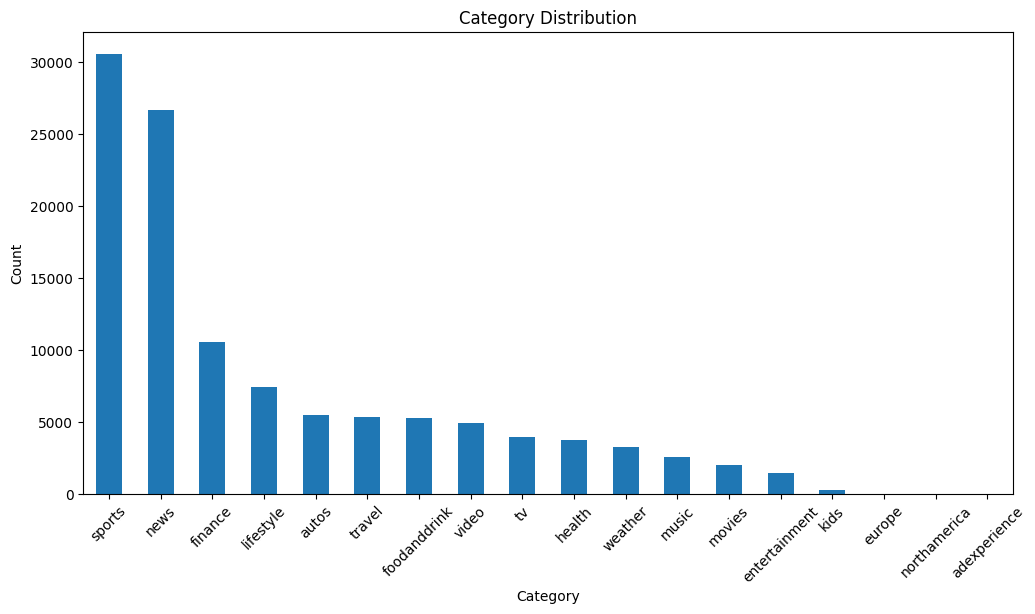

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df["label"].value_counts().plot(kind="bar")
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

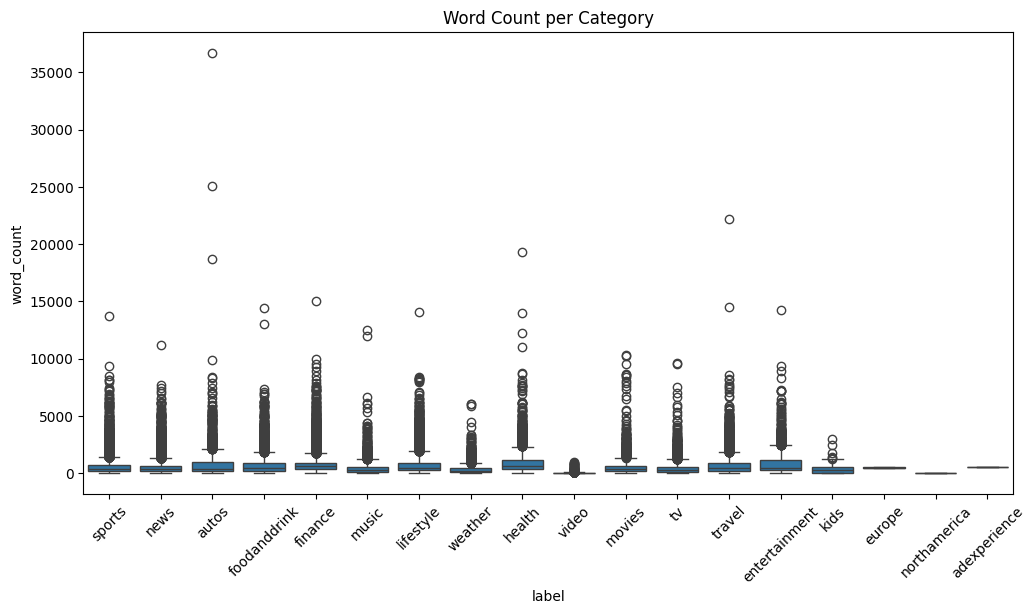

In [11]:
import seaborn as sns
def word_count(text):
    return len(text.split())

df["word_count"] = df["text"].apply(word_count)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="label", y="word_count")
plt.xticks(rotation=45)
plt.title("Word Count per Category")
plt.show()

*ML Models*

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

In [13]:
df = df[["text", "label"]]
df["label_encoded"] = le.fit_transform(df["label"])
df

,text,label,label_encoded
0,Predicting Atlanta United's lineup against Col...,sports,13
1,Mitch McConnell: DC statehood push is 'full bo...,news,11
2,Home In North Highlands Damaged By Fire NORTH ...,news,11
3,Meghan McCain blames 'liberal media' and 'thir...,news,11
4,Today in History: Aug 1 1714: George I becomes...,news,11
...,...,...,...
113757,Hope who? Alyssa Naeher's penalty save sends U...,sports,13
113758,Chris Sale Explains What Specifically Has Gone...,sports,13
113759,Raptor fans jam streets to celebrate 1st NBA t...,sports,13
113760,Judge won't allow Flynn to fire his attorneys ...,news,11


In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label_encoded"],
    test_size=0.2,
    random_state=42
)

In [15]:
# Four Models 

pipelines = {
    "LR_TFIDF": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")),
        ("clf", LogisticRegression(max_iter=5000))
    ]),

    "LR_BOW": Pipeline([
        ("bow", CountVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")),
        ("clf", LogisticRegression(max_iter=5000))
    ]),

    "SVM_TFIDF": Pipeline([
        ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")),
        ("clf", LinearSVC())
    ]),

    "SVM_BOW": Pipeline([
        ("bow", CountVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")),
        ("clf", LinearSVC())
    ]),
}

In [16]:
# Evaluate Models
def evaluate_model(name, pipeline):
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds, average="weighted", zero_division=0))
    print("Recall:", recall_score(y_test, preds, average="weighted", zero_division=0))
    print("F1 Score:", f1_score(y_test, preds, average="weighted", zero_division=0))
    print("\nClassification Report:\n", classification_report(y_test, preds, zero_division=0))

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Weighted F1": f1_score(y_test, preds, average="weighted")
    }

In [17]:
# Four Models Run


all_results = []

for name, pipe in pipelines.items():
    result = evaluate_model(name, pipe)
    all_results.append(result)

results_df = pd.DataFrame(all_results)
print("\n====== FINAL COMPARISON OF 4 MODELS ======")
print(results_df)


===== LR_TFIDF =====
Accuracy: 0.7810562420298139
Precision: 0.7810559453086995
Recall: 0.7810562420298139
F1 Score: 0.778427389726029

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.82      0.84      1109
           2       0.72      0.37      0.49       310
           3       0.00      0.00      0.00         1
           4       0.83      0.79      0.81      2070
           5       0.85      0.81      0.83      1034
           6       0.83      0.74      0.78       744
           7       0.00      0.00      0.00        53
           8       0.66      0.65      0.66      1489
           9       0.73      0.65      0.69       415
          10       0.75      0.61      0.67       504
          11       0.70      0.81      0.75      5356
          13       0.94      0.95      0.95      6083
          14       0.69      0.56      0.62      1113
          15       0.67      0.60      0.63       837
          16       0.45     

c:\Users\thiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



===== SVM_BOW =====
Accuracy: 0.7383580317488238
Precision: 0.7432515006221178
Recall: 0.7383580317488238
F1 Score: 0.7392217852092074

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.84      0.77      0.80      1109
           2       0.50      0.40      0.44       310
           3       0.00      0.00      0.00         1
           4       0.81      0.75      0.78      2070
           5       0.72      0.75      0.74      1034
           6       0.71      0.74      0.72       744
           7       0.06      0.08      0.07        53
           8       0.64      0.54      0.59      1489
           9       0.62      0.59      0.60       415
          10       0.62      0.60      0.61       504
          11       0.70      0.73      0.72      5356
          12       0.00      0.00      0.00         0
          13       0.92      0.94      0.93      6083
          14       0.63     

In [18]:
best_model_name = results_df.sort_values("Weighted F1", ascending=False).iloc[0]["Model"]
print("\nBest Model:", best_model_name)


Best Model: LR_TFIDF


In [19]:
best_model = pipelines[best_model_name]
best_model.fit(X_train, y_train)

joblib.dump(best_model, "f:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/best_text_ML_model.pkl")
print("Model saved as best_text_ML_model.pkl")

Model saved as best_text_ML_model.pkl


In [20]:
joblib.dump(le, "f:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/label_encoder.pkl")

['f:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/label_encoder.pkl']

*DL Model*

In [78]:
#Imports
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
import os
from tensorflow.keras.layers import (
    Embedding,
    Bidirectional,
    LSTM,
    Dense,
    Dropout,
    Input,
    Conv1D,
    GlobalMaxPooling1D,
    Concatenate,
    SpatialDropout1D,       # NEW: for better regularization in sequence models
    BatchNormalization      # NEW: for stabilizing activations
)
import pickle

In [54]:
# ---------------------------
# Parameters
# ---------------------------
MAX_SEQ_LEN = 200       # max words per text
VOCAB_SIZE = 50000      # max vocabulary size
EMBEDDING_DIM = 300     # GloVe dim
DROPOUT_RATE = 0.5
CNN_FILTERS = 128
CNN_KERNEL_SIZE = 5
LSTM_UNITS = 128

In [44]:
df["clean_text"] = df["text"].apply(clean_text)

In [45]:
texts = df["clean_text"].values
labels = df["label"].values

In [55]:
# Encode labels
#Prepare Labels

le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)
num_classes = y.shape[1]
print("Number of classes:", num_classes)

Number of classes: 18


In [28]:
pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.4 MB 4.8 MB/s eta 0:00:05
   -- ------------------------------------- 1.6/24.4 MB 4.9 MB/s eta 0:00:05
   ---- ----------------------------------- 2.6/24.4 MB 4.9 MB/s eta 0:00:05
   ------ --------------------------------- 3.9/24.4 MB 5.0 MB/s eta 0:00:05
   -------- ------------------------------- 5.2/24.4 MB 5.1 MB/s eta 0:00:04
   --------- ------------------------------ 6.0/24.4 MB 5.0 MB/s eta 0:00:04
   ------------ --------------------------- 7.3/24.4 MB 5.1 MB/s eta 0:00:04
   ------------- -------------------------- 8.4/24.4 MB 5.0 MB/s eta 0:00:04
   -------------- ------------------------- 8.7/24.4 MB 4.8 MB/s eta 0:00:04
   --------------- ------------------------ 9.2/24.4 MB 4.5 MB/s eta 0:00:04
   ---------------- ----------------------- 10.0/24.4 MB 4.3 MB/s eta 0:00:04
   ----------------- ---------------------- 10.5/24.4 MB 4.2 MB/s eta 0:00:04
   -


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-100")


[==================================================] 100.0% 128.1/128.1MB downloaded


In [68]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    texts, y, test_size=0.2, random_state=42
)

In [69]:
# Tokenizer
MAX_WORDS = 50000
MAX_LEN = 150
EMBED_DIM = 300   # MUST MATCH Word2Vec or GloVe EMBEDDING DIMENSION

tokenizer = Tokenizer(num_words=MAX_WORDS,oov_token="<OOV>")
tokenizer.fit_on_texts(texts) # this assigns index to all words in the corpus means this have word and their index

# Convert texts to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(X_train) # converts each text to a sequence of integers based on the tokenizer's word index
X_test_seq  = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post")
X_test_pad  = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding="post")

vocab_size = min(MAX_WORDS, len(tokenizer.word_index) + 1) # +1 for padding token which is index 0

In [70]:
print("Vocab size:", vocab_size)
print("Num classes:", num_classes)

Vocab size: 50000
Num classes: 18


In [73]:
# Load GloVe Model and convert to word2vec format

from gensim.scripts.glove2word2vec import glove2word2vec

glove_input = "F:/Python_WC/Final_project/glove/glove.6B.300d.txt"
word2vec_output = "F:/Python_WC/Final_project/glove/glove.6B.300d.w2v.txt"
glove2word2vec(glove_input, word2vec_output)

C:\Users\thiya\AppData\Local\Temp\ipykernel_20532\3117026615.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input, word2vec_output)


(400000, 300)

In [74]:
# load the Glove word2vec model
# the reason for converting the glove to word2vec is using golVe directly would be slow in parse time and use more ram

from gensim.models import KeyedVectors

gloVe_model = KeyedVectors.load_word2vec_format(
    r"F:/Python_WC/Final_project/glove/glove.6B.300d.w2v.txt",
    binary=False
)

In [75]:
# Vector Embeddings of GloVe
embedding_matrix_glove = np.zeros((vocab_size,EMBED_DIM))

for word,i in tokenizer.word_index.items():
    if i<MAX_WORDS:
        if word in gloVe_model:
            embedding_matrix_glove[i] = gloVe_model[word]
        else:
            embedding_matrix_glove[i] = np.random.normal(scale=0.6, size=(EMBED_DIM,))

In [76]:
embedding_matrix_glove.shape

(50000, 300)

In [77]:
# Common Callbacks for All DL Models

early = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
    verbose=1
)

*BiLSTM + GloVe*

In [79]:
bilstm_glove = Sequential([
    Embedding(
        vocab_size,
        EMBED_DIM,
        weights=[embedding_matrix_glove],
        input_length=MAX_LEN,
        trainable=False
    ),
    SpatialDropout1D(0.2),        # NEW
    Bidirectional(
        LSTM(128, return_sequences=False, dropout=0.3)  # CHANGED units from 64 -> 128
    ),
    BatchNormalization(),         # NEW
    Dense(256, activation="relu"),
    Dropout(0.4),
    Dense(num_classes, activation="softmax")
])

bilstm_glove.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

print("\n=== Training BiLSTM + GloVe ===")
history3 = bilstm_glove.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=8,               # CHANGED: 10 -> 8, with early stopping
    batch_size=128,
    callbacks=[early],
    verbose=1
)

c:\Users\thiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



=== Training BiLSTM + GloVe ===
Epoch 1/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 524s 902ms/step - accuracy: 0.6464 - loss: 1.1338 - val_accuracy: 0.7302 - val_loss: 0.8073
Epoch 2/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 511s 897ms/step - accuracy: 0.7192 - loss: 0.8589 - val_accuracy: 0.7600 - val_loss: 0.7276
Epoch 3/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 551s 877ms/step - accuracy: 0.7447 - loss: 0.7731 - val_accuracy: 0.7667 - val_loss: 0.6927
Epoch 4/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 535s 935ms/step - accuracy: 0.7567 - loss: 0.7236 - val_accuracy: 0.7731 - val_loss: 0.6771
Epoch 5/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.7681 - loss: 0.6903 - val_accuracy: 0.7754 - val_loss: 0.6767
Epoch 6/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 546s 959ms/step - accuracy: 0.7762 - loss: 0.6567 - val_accuracy: 0.7723 - val_loss: 0.6742
Epoch 7/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 510s 868ms/step - accuracy: 0.7830 - loss: 0.6302 - val_accuracy: 0.7844 - val_loss: 0.6467
Epoch 8/8
569/569 ━━━━━━━━━━━━━━━━━━━━ 507s 876ms/ste

*TextCNN + GloVe*

In [80]:
input_layer_g = Input(shape=(MAX_LEN,))
embed_layer_g = Embedding(
    vocab_size,
    EMBED_DIM,
    weights=[embedding_matrix_glove],
    input_length=MAX_LEN,
    trainable=False
)(input_layer_g)

xg = SpatialDropout1D(0.2)(embed_layer_g)  # NEW

conv3_g = Conv1D(128, 3, activation="relu")(xg)
conv4_g = Conv1D(128, 4, activation="relu")(xg)
conv5_g = Conv1D(128, 5, activation="relu")(xg)

pool3_g = GlobalMaxPooling1D()(conv3_g)
pool4_g = GlobalMaxPooling1D()(conv4_g)
pool5_g = GlobalMaxPooling1D()(conv5_g)

merged_g = Concatenate()([pool3_g, pool4_g, pool5_g])

merged_g = BatchNormalization()(merged_g)   # NEW

dense_g = Dense(256, activation="relu")(merged_g)
drop_g = Dropout(0.5)(dense_g)
output_layer_g = Dense(num_classes, activation="softmax")(drop_g)

textcnn_glove = Model(inputs=input_layer_g, outputs=output_layer_g)

textcnn_glove.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

print("\n=== Training TextCNN + GloVe ===")
history4 = textcnn_glove.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=8,
    batch_size=256,
    callbacks=[early],
    verbose=1
)


=== Training TextCNN + GloVe ===
Epoch 1/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.6653 - loss: 1.1016 - val_accuracy: 0.7499 - val_loss: 0.7511
Epoch 2/8
285/285 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.7431 - loss: 0.7894 - val_accuracy: 0.7611 - val_loss: 0.7165
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.


In [81]:
# save the tokenizer
pickle.dump(tokenizer, open("F:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/Classification/tokenizer.pkl", "wb"))
print("Tokenizer saved to tokenizer.pkl")

Tokenizer saved to tokenizer.pkl


In [83]:
# EVALUATE & COMPARE DL MODELS (4)
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
models = {
    "BiLSTM_GloVe": bilstm_glove,
    "TextCNN_GloVe": textcnn_glove
}

y_test_labels = np.argmax(y_test, axis=1)
dl_results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    y_pred = model.predict(X_test_pad, verbose=0)
    y_pred_labels = np.argmax(y_pred, axis=1)

    acc = accuracy_score(y_test_labels, y_pred_labels)
    
    report = classification_report(
        y_test_labels,
        y_pred_labels,
        output_dict=True,
        zero_division=0
    )

    dl_results[name] = {
        "accuracy": acc,
        "f1_macro": report["macro avg"]["f1-score"],
        "precision_macro": report["macro avg"]["precision"],
        "recall_macro": report["macro avg"]["recall"]
    }

    print(classification_report(
        y_test_labels,
        y_pred_labels,
        zero_division=0
    ))
    print("=" * 80)

df_results = pd.DataFrame(dl_results).T
df_results = df_results.sort_values(by="accuracy", ascending=False)

print("\nDL Model comparison (2 models):\n")
print(df_results)

best_dl_model_name = df_results.index[0]
print("\nBest DL model based on accuracy:", best_dl_model_name)
print(df_results.loc[best_dl_model_name])


Evaluating BiLSTM_GloVe...
              precision    recall  f1-score   support

           1       0.85      0.85      0.85      1109
           2       0.62      0.28      0.38       310
           3       0.00      0.00      0.00         1
           4       0.78      0.83      0.80      2070
           5       0.80      0.85      0.82      1034
           6       0.82      0.74      0.77       744
           7       0.40      0.04      0.07        53
           8       0.65      0.63      0.64      1489
           9       0.71      0.60      0.65       415
          10       0.62      0.77      0.69       504
          11       0.77      0.73      0.75      5356
          13       0.95      0.96      0.95      6083
          14       0.65      0.57      0.61      1113
          15       0.58      0.64      0.61       837
          16       0.48      0.63      0.54       969
          17       0.74      0.73      0.73       654

    accuracy                           0.78     2274

In [ ]:
# Save best DL model to .h5
best_dl_model = models[best_dl_model_name]
dl_save_path = f"F:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/Classification/{best_dl_model_name}.h5"
best_dl_model.save(dl_save_path)
print(f"\nSaved best DL model as: {dl_save_path}")


Saved best DL model as: F:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/Classification/BiLSTM_GloVe.h5


In [86]:
ml_results = results_df.copy()  
ml_results["Type"] = "ML"

dl_results = df_results.copy()
dl_results = dl_results.rename(columns={
    "accuracy": "Accuracy",
    "f1_macro": "F1",
    "precision_macro": "Precision",
    "recall_macro": "Recall"
})
dl_results["Model"] = dl_results.index
dl_results["Type"] = "DL"
dl_results = dl_results.reset_index(drop=True)

final_results = pd.concat([ml_results, dl_results], ignore_index=True)

print("\n============ 🔥 FINAL COMPARISON: ML vs DL (6 MODELS) 🔥 ============\n")
print(final_results)

# ==========================================================
# IDENTIFY BEST MODELS
# ==========================================================

best_overall = final_results.loc[final_results["Accuracy"].idxmax()]
best_ml = ml_results.loc[ml_results["Accuracy"].idxmax()]
best_dl = dl_results.loc[dl_results["Accuracy"].idxmax()]

print("\n================== 🏆 BEST MODELS ==================")
print("\nBest ML Model:")
print(best_ml)

print("\nBest DL Model:")
print(best_dl)

print("\n🏆 BEST OVERALL MODEL:")
print(best_overall)


============ 🔥 FINAL COMPARISON: ML vs DL (6 MODELS) 🔥 ============

           Model  Accuracy  Weighted F1 Type        F1  Precision    Recall
0       LR_TFIDF  0.781056     0.778427   ML       NaN        NaN       NaN
1         LR_BOW  0.727892     0.728728   ML       NaN        NaN       NaN
2      SVM_TFIDF  0.775296     0.772787   ML       NaN        NaN       NaN
3        SVM_BOW  0.738358     0.739222   ML       NaN        NaN       NaN
4   BiLSTM_GloVe  0.780968          NaN   DL  0.617033   0.650088  0.614739
5  TextCNN_GloVe  0.747548          NaN   DL  0.556142   0.613361  0.540354

================== 🏆 BEST MODELS ==================

Best ML Model:
Model          LR_TFIDF
Accuracy       0.781056
Weighted F1    0.778427
Type                 ML
Name: 0, dtype: object

Best DL Model:
Accuracy         0.780968
F1               0.617033
Precision        0.650088
Recall           0.614739
Model        BiLSTM_GloVe
Type                   DL
Name: 0, dtype: object

🏆 BEST OVERALL

*Transformers*

In [91]:
import pandas as pd
df_trans = pd.read_csv('F:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/Data/news.tsv', sep='\t',engine='python',on_bad_lines='skip')
df_trans.head()

,News ID,Category,Topic,Headline,News body,Title entity,Entity content
0,N10000,sports,soccer,Predicting Atlanta United's lineup against Col...,"Only FIVE internationals allowed, count em, FI...","{""Atlanta United's"": 'Atlanta United FC'}","{'Atlanta United FC': {'type': 'item', 'id': '..."
1,N10001,news,newspolitics,Mitch McConnell: DC statehood push is 'full bo...,WASHINGTON -- Senate Majority Leader Mitch McC...,"{'DC': 'Washington, D.C.'}","{'Washington, D.C.': {'type': 'item', 'id': 'Q..."
2,N10002,news,newsus,Home In North Highlands Damaged By Fire,NORTH HIGHLANDS (CBS13) Fire damaged a home ...,{},{}
3,N10003,news,newspolitics,Meghan McCain blames 'liberal media' and 'thir...,Meghan McCain is speaking out after a journali...,{},{}
4,N10004,news,newsworld,Today in History: Aug 1,"1714: George I becomes King Georg Ludwig, Elec...",{},{}


In [92]:
import pandas as pd

# Load Transformer metrics
trans_csv = "F:/Python_WC/Final_project/Multi-Task_News_Intelligence_System/Classification/model_comparisons.csv"
transformer_df = pd.read_csv(trans_csv)

print("\n=== TRANSFORMER RESULTS ===")
print(transformer_df)


=== TRANSFORMER RESULTS ===
   eval_loss  eval_accuracy   eval_f1  eval_precision  eval_recall  \
0   0.629795       0.795743  0.794227        0.794753     0.795743   
1   0.635729       0.796931  0.796041        0.796747     0.796931   

   eval_runtime  eval_samples_per_second  eval_steps_per_second  epoch  \
0       91.7143                  247.955                 15.505    2.0   
1      106.9484                  212.635                 26.583    2.0   

                model_name  
0  DistilBERT-base-uncased  
1        BERT-base-uncased  


In [93]:
# Prepare ML results for comparison

ml_results = results_df.copy()
ml_results = ml_results.rename(columns={
    "Model": "Model",
    "Accuracy": "Accuracy",
    "Weighted F1": "F1"
})
ml_results["Precision"] = None
ml_results["Recall"] = None
ml_results["Type"] = "ML"

# Prepare DL results for comparison

dl_std = df_results.copy()

dl_std = dl_std.rename(columns={
    "accuracy": "Accuracy",
    "f1_macro": "F1",
    "precision_macro": "Precision",
    "recall_macro": "Recall"
})

dl_std["Model"] = dl_std.index
dl_std["Type"] = "DL"
dl_std = dl_std.reset_index(drop=True)

# Prepare Transformer results for comparison

tfm_std = transformer_df.rename(columns={
    "model_name": "Model",
    "eval_accuracy": "Accuracy",
    "eval_f1": "F1",
    "eval_precision": "Precision",
    "eval_recall": "Recall"
})

tfm_std["Type"] = "TRANSFORMER"
tfm_std = tfm_std[["Model","Type","Accuracy","F1","Precision","Recall"]]

In [94]:
# Merge all results
final_comparison_df = pd.concat(
    [
        ml_results[["Model","Type","Accuracy","F1","Precision","Recall"]],
        dl_std[["Model","Type","Accuracy","F1","Precision","Recall"]],
        tfm_std
    ],
    ignore_index=True
)

print("\n==================== 🔥 FINAL MODEL COMPARISON 🔥 ====================\n")
print(final_comparison_df.sort_values("Accuracy", ascending=False))


==================== 🔥 FINAL MODEL COMPARISON 🔥 ====================

                     Model         Type  Accuracy        F1  Precision  \
7        BERT-base-uncased  TRANSFORMER  0.796931  0.796041   0.796747   
6  DistilBERT-base-uncased  TRANSFORMER  0.795743  0.794227   0.794753   
0                 LR_TFIDF           ML  0.781056  0.778427        NaN   
4             BiLSTM_GloVe           DL  0.780968  0.617033   0.650088   
2                SVM_TFIDF           ML  0.775296  0.772787        NaN   
5            TextCNN_GloVe           DL  0.747548  0.556142   0.613361   
3                  SVM_BOW           ML  0.738358  0.739222        NaN   
1                   LR_BOW           ML  0.727892  0.728728        NaN   

     Recall  
7  0.796931  
6  0.795743  
0       NaN  
4  0.614739  
2       NaN  
5  0.540354  
3       NaN  
1       NaN  


C:\Users\thiya\AppData\Local\Temp\ipykernel_20532\3566095769.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_comparison_df = pd.concat(


In [95]:
best_overall = final_comparison_df.loc[
    final_comparison_df["Accuracy"].idxmax()
]

print("\n==================== 🏆 FINAL SELECTED MODEL 🏆 ====================")
print("Model Name :", best_overall["Model"])
print("Model Type :", best_overall["Type"])
print("Accuracy   :", round(best_overall["Accuracy"],4))
print("F1 Score   :", round(best_overall["F1"],4))
print("Precision  :", round(best_overall["Precision"],4)
      if best_overall["Precision"]!=None else "N/A")
print("Recall     :", round(best_overall["Recall"],4)
      if best_overall["Recall"]!=None else "N/A")


==================== 🏆 FINAL SELECTED MODEL 🏆 ====================
Model Name : BERT-base-uncased
Model Type : TRANSFORMER
Accuracy   : 0.7969
F1 Score   : 0.796
Precision  : 0.7967
Recall     : 0.7969
